In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Step 1: Generate a synthetic non-linear dataset (two moons)
X, y = datasets.make_moons(n_samples=300, noise=0.2, random_state=42)

# Step 2: Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# Step 3: Train a non-linear SVM with RBF kernel
clf = SVC(kernel='rbf', C=1.0, gamma='scale')  # RBF kernel is default in SVC
clf.fit(X_train, y_train)

# Step 4: Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.97


In [4]:
# Step 5: Visualize decision boundary
def plot_decision_boundary(clf, X, y):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Non-linear SVM with RBF Kernel")
    plt.show()


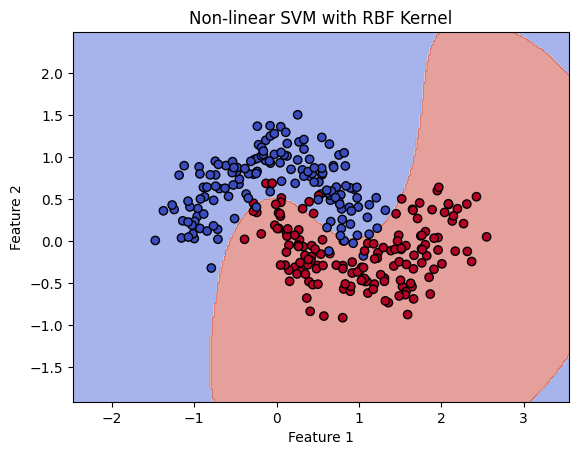

In [5]:
plot_decision_boundary(clf, X, y)